### Introduction

We will start with Generig Graph search. Graph Search is an algorithm where, given a graph, G(V, E), with a starting vertex s $\in$ V, we identify all vertices of G reachable from s


The generic graph search algorithm does the following, with the input grapg G = (V, E) and start vertex s

```
mark s as explored and all other vertices as unexplored

while there is an edge (v, w) in E where v is explored and w is not explored:
    mark w as explored

```

---

The above algorithm is very abstract and the strategy to pick the edge is not specified. In the above algorithm, the vertex v is in the frontier and we wish to find all edges with one vertex in frontier and other outside. Two strategies that we can look at are 

- For all vertices in the frontier, explore all edges that go from them to vertices outside the frontier
- Another strategy would be 
    - Pick one vertex in the frontier
    - Pick one edge from the this vertex to another vertex not in frontier
    - Add this another vertex to the frontier and aggressively keep adding the vertices in the frontier before looking at another vertex, unlike the first strategy
    
These two approches are BFS(Breadth First Search) and DFS (Depth First Search) algorothms for graph exploration. While they both work for finding all possible vertices reachable from a starting vertex s in time $\theta(m + n)$, for some use cases we choose one over another.

For example, for computing the shortst distance to a vertex from a starting vertex s can be done only using BFS efficiently. Where as some use cases like finding strongly connected components in case of directed graphs, we need DFS.



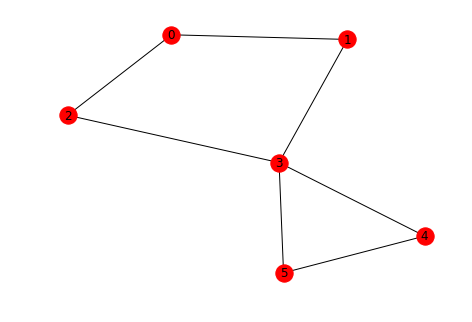

In [26]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#A = np.matrix([[0, 1, 1, 0, 0, 0], 
#               [1, 0, 0, 1, 0, 0],
#               [1, 0, 0, 1, 0, 0],
#               [0, 1, 1, 0, 1, 1],               
#               [0, 0, 0, 1, 0, 1],
#               [0, 0, 0, 1, 1, 0],               
#              ])
#G = nx.from_numpy_matrix(A)

G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
plt.show()


Consider the above graph, starting from vertex 0 which is at level 0, vertices 1 and 2 are at level 1, vertex 3 at level 2 and vertices 4 and 5 at level 3.

BFS will discover these edges in this very order. 

Following Python code makes use of queues and implements BFS and also give is the level of each of the vertex from a provided starting vertex. We saw how addacency lists can be defined in Python in previous notebook, to avoid copying over the code, we will make use of the graph defined in above cell from python package ``networkx`` to get adjacent edges of a given vertex. 

In [32]:
adjacency_dict = {v: edges for v, edges in zip(G.nodes(), G.adjacency_list())}
adjacency_dict

{0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [2, 1, 4, 5], 4: [3, 5], 5: [3, 4]}


If we look at the above dictionary, the key of the dictionary is the vertex and the value is  the list of edges connected to it. With this dictionary, let us use bfs to find the level of vertices starting with vertex 0 as the starting vertex and see of we get the levels we expect.


In [45]:
def bfs(adg_dict, start_vertex):
    from queue import Queue
    import math
    
    #1. Create queue, we will add tuple of the vertex and level
    q = Queue()
    
    #2. Initialize all levels to infinite. Any vertex not reachable from start_vertex will stay infinite
    levels = [math.inf] * len(adg_dict.keys())
    
    #3. Set of explored vertices
    explored = set()
    
    #4. Start by putting the start_vertex as level 0
    q.put((start_vertex, 0))
    
    #5. Mark, start vertex as explored
    explored.add(start_vertex)
    
    #6. Iterate till we have no more elements in the queue
    while not q.empty():
        #7. Get the vertex and its level (stored as tuple) from head of the queue
        vertex, level = q.get()
        
        #8. Store the level of the vertex in the list (remember, we will never visit the vertex more than once)
        levels[vertex] = level
        
        #9. Get adjacent vertices of this vertex
        for v in adg_dict[vertex]:
            
            #10. Mark them as explored, we dont want to add them to queue if we come across this vertex again
            if v not in explored:                
                explored.add(v)
                
                #11. The level of this vertex is one more than the one we used to get this vertex
                q.put((v, level + 1))

    #12. Once the queue is empty, all vertices reachable from the start are explored, return the list with 
    #the levels of the vertices
    return levels
    
levels = bfs(adjacency_dict, 0)
for v, l in zip(adjacency_dict.keys(), levels):
    print('Node %d is at level %d'%(v, l))

Node 0 is at level 0
Node 1 is at level 1
Node 2 is at level 1
Node 3 is at level 2
Node 4 is at level 3
Node 5 is at level 3



This is what we expected to get. 